# 타이타닉 생존자 예측

## 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# --------------------------------------------
바쁜사람은 아래 요약정리한 곳으로 바로 이동 가능
## null값 처리
### age의 Null은 평균나이, 나머지 칼럼의 null은 n으로 변경

In [5]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이트 세트 null 값 개수', titanic_df.isnull().sum())

데이트 세트 null 값 개수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 남아있는 문자열 피쳐값 확인

In [10]:
print('Sex')
print(titanic_df['Sex'].value_counts())

print()
print('Cabin')
print(titanic_df['Cabin'].value_counts())

print()
print('Embarked')
print(titanic_df['Embarked'].value_counts())

Sex
male      577
female    314
Name: Sex, dtype: int64

Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
D                3
              ... 
T                1
B71              1
C101             1
C90              1
B94              1
Name: Cabin, Length: 148, dtype: int64

Embarked
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


* cabin 값 정리
    * N 값이 가장 많고
    * 선실번호 중 등급을 나타내는 가장 앞번호가 중요

In [12]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

* 생존자수 비교

In [13]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

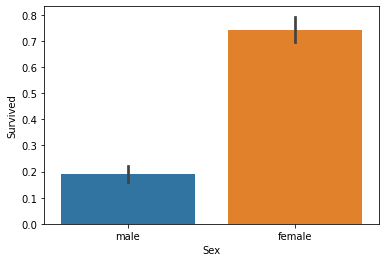

In [16]:
# 성별에 따른 생존자수
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

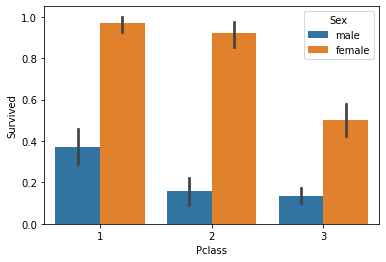

In [18]:
# 객실 등급별 생존자수
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

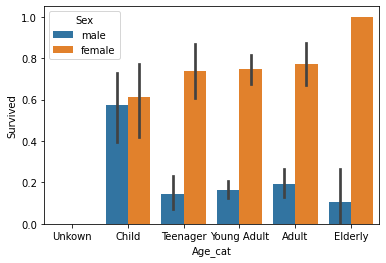

In [19]:
# 나이별 생존자수
def get_category(age):
    cat=''
    if age <= -1: cat = 'Unknown'
    elif age <= 10: cat = 'Child'
    elif age <=20: cat = 'Teenager'
    elif age <=35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# x축을 내가 원하는 순서로 정리
x_names = ['Unkown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']

# lambda 이용
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=x_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

* 문자열 카테고리 피처를 숫자형으로 변환

In [21]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


여기까지 내용을 아래 요약정리
# ------------------------------------------------------
## 요약정리

In [25]:
# null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna('0', inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 선실번호 중 등급을 나타내는 맨 앞글자만 남김
    
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [26]:
# 원본 데이터 재로딩, 피처/레이블 데이터 세트 추출
titanic_df = pd.read_csv('./train.csv')

y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)

x_titanic_df = transform_features(x_titanic_df)

In [27]:
# 학습 데스트 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df,
                                                   test_size = 0.2, random_state = 11)

## 알고리즘 종류별 학습 및 생존자 예측

In [28]:
from sklearn.tree import DecisionTreeClassifier # 의사결정트리
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트
from sklearn.linear_model import LogisticRegression # 로지스틱회귀
from sklearn.metrics import accuracy_score # 정확도

### 의사결정트리

In [33]:
# 사이킷런 Classifier 클래스 생성
df_clf = DecisionTreeClassifier(random_state=11)

# 학습
df_clf.fit(x_train, y_train)

# 예측
df_pred = df_clf.predict(x_test)

# 평가
print(f'의사결정트리 정확도 : {accuracy_score(y_test, df_pred)}')

의사결정트리 정확도 : 0.7877094972067039


### 랜덤 포레스트

In [35]:
# 사이킷런 Classifier 클래스 생성
rf_clf = RandomForestClassifier(random_state=11)

# 학습
rf_clf.fit(x_train, y_train)

# 예측
rf_pred = rf_clf.predict(x_test)

# 평가
print(f'랜덤포레스트 정확도 : {accuracy_score(y_test, rf_pred)}')

랜덤포레스트 정확도 : 0.8547486033519553


### 로지스틱 회귀

In [56]:
# 사이킷런 Classifier 클래스 생성
lr_clf = LogisticRegression()

# 학습
lr_clf.fit(x_train, y_train)

# 예측
lr_pred = lr_clf.predict(x_test)

# 평가
print(f'로지스틱회귀 정확도 : {accuracy_score(y_test, lr_pred)}')

로지스틱회귀 정확도 : 0.8491620111731844


/Users/limkahyun/anaconda3/envs/sona/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 의사결정트리 교차검증
### 1. KFold 교차검증

In [46]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    # kfold 교차검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # classifier 학습, 예측, 정확도 계산
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
    
        print(f"교차검증 {iter_count} 정확도 : {accuracy}")
        
    # 5개 폴드 평균 정확도 계산
    mean_score = np.mean(scores)
    print(f"평균 정확도 : {mean_score}")
        
# exec_kfold 호출
exec_kfold(df_clf, folds=5)

교차검증 0 정확도 : 0.7541899441340782
교차검증 1 정확도 : 0.7808988764044944
교차검증 2 정확도 : 0.7865168539325843
교차검증 3 정확도 : 0.7696629213483146
교차검증 4 정확도 : 0.8202247191011236
평균 정확도 : 0.782298662984119


### 2. cross_val_score() 교차검증
cross_val_score()는 기본적으로 stratifiedKFold를 이용해서 교차검증 진행

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(df_clf, x_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print(f"교차검증 {iter_count} 정확도 : {accuracy}")
    
print(f"평균정확도 : {np.mean(scores)}")

교차검증 0 정확도 : 0.7430167597765364
교차검증 1 정확도 : 0.7752808988764045
교차검증 2 정확도 : 0.7921348314606742
교차검증 3 정확도 : 0.7865168539325843
교차검증 4 정확도 : 0.8426966292134831
평균정확도 : 0.7879291946519366


### 3. GridSearchCV 교차검증

In [55]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5],
              'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(df_clf, param_grid = parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print('최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print(f'최고 정확도 : {grid_dclf.best_score_}')
best_dclf = grid_dclf.best_estimator_

# 예측 및 평가
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print(f'향상된 정확도 : {accuracy}')

최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도 : 0.7991825076332119
향상된 정확도 : 0.8715083798882681
